# Exploratory Data Analysis

Use this notebook to inspect raw data, check quality, and prototype features.

## Outline
- Setup and data loading
- Exploratory data analysis (schema, distributions, correlations)
- Data preparation and feature engineering
- Modeling prototypes (baseline, overfitting check, neural network)


## 1. Setup and Data Loading

Imports, display settings, and loading the raw CSV into a DataFrame.


In [27]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

# TODO: set your raw data path
raw_path = '../data/raw/278k_song_labelled.csv'

df = pd.read_csv(raw_path)
df.head()

,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [28]:
# Drop the useless column 'Unnamed: 0'
df = df.drop('Unnamed: 0', axis=1)
df.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1


In [29]:
# Check quick information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   duration (ms)     277938 non-null  float64
 1   danceability      277938 non-null  float64
 2   energy            277938 non-null  float64
 3   loudness          277938 non-null  float64
 4   speechiness       277938 non-null  float64
 5   acousticness      277938 non-null  float64
 6   instrumentalness  277938 non-null  float64
 7   liveness          277938 non-null  float64
 8   valence           277938 non-null  float64
 9   tempo             277938 non-null  float64
 10  spec_rate         277938 non-null  float64
 11  labels            277938 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 25.4 MB


In [30]:
# Check the number of columns
df.columns


Index(['duration (ms)', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'spec_rate', 'labels'],
      dtype='object')

## 2.1 Exploratory Data Analysis (EDA)

In this stage, Exploratory Data Analysis (EDA) is conducted to gain a comprehensive understanding of the structure, characteristics, and quality of the Spotify dataset before building the classification models. The EDA process includes examining the data schema, performing descriptive statistics, analyzing variable distributions, identifying missing values and potential outliers, and visualizing relationships among variables.

### Feature Description

The dataset consists of audio features extracted from Spotify, which capture various musical and acoustic characteristics of each track:

- **duration_ms**: Duration of the track in milliseconds.
- **danceability**: A measure of how suitable a track is for dancing, based on tempo, rhythm stability, and beat strength.
- **energy**: A measure of intensity and activity, representing how energetic a track feels.
- **loudness**: The overall loudness of a track, measured in decibels (dB).
- **speechiness**: The presence of spoken words in a track.
- **acousticness**: The likelihood that a track is acoustic.
- **instrumentalness**: The likelihood that a track contains no vocals.
- **liveness**: The probability that the track was recorded during a live performance.
- **valence**: A measure of the musical positivity conveyed by a track.
- **tempo**: The estimated tempo of a track in beats per minute (BPM).
- **spec_rate**: Spectral rate feature extracted during audio signal processing.


In [31]:
y = df['labels']
X = df.drop('labels', axis=1)
print(y.head())
print(X.head())

0    2
1    1
2    1
3    0
4    1
Name: labels, dtype: int64
   duration (ms)  danceability  energy  loudness  speechiness  acousticness  \
0       195000.0         0.611   0.614    -8.815       0.0672        0.0169   
1       194641.0         0.638   0.781    -6.848       0.0285        0.0118   
2       217573.0         0.560   0.810    -8.029       0.0872        0.0071   
3       443478.0         0.525   0.699    -4.571       0.0353        0.0178   
4       225862.0         0.367   0.771    -5.863       0.1060        0.3650   

   instrumentalness  liveness  valence    tempo     spec_rate  
0          0.000794    0.7530    0.520  128.050  3.446154e-07  
1          0.009530    0.3490    0.250  122.985  1.464234e-07  
2          0.000008    0.2410    0.247  170.044  4.007850e-07  
3          0.000088    0.0888    0.199   92.011  7.959809e-08  
4          0.000001    0.0965    0.163  115.917  4.693131e-07  


In [32]:
# Statiscal description of data
X.describe()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
count,2.779380e+05,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05
mean,2.324961e+05,0.552583,0.556866,-10.363654,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,4.754654e-07
std,1.171830e+05,0.188905,0.279681,6.672049,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,9.190229e-07
min,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.720130e+05,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.531461e-07
50%,2.131055e+05,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.345459e-07
75%,2.648660e+05,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,4.449937e-07
max,3.919895e+06,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05


In [33]:
# Check null values
X.isnull().sum()

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
dtype: int64

labels
1    106429
0     82058
2     47065
3     42386
Name: count, dtype: int64


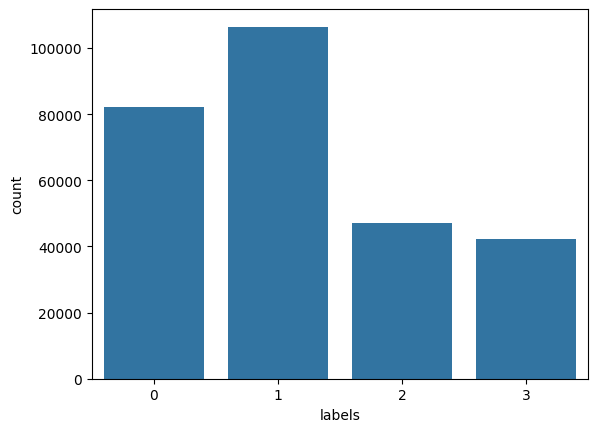

In [34]:
print(y.value_counts())
sns.countplot(x=y)
plt.show()

### Label Distribution Note
The label distribution indicates a moderately imbalanced multi-class dataset, with the happy class having the highest number of samples, 
while energetic and calm are underrepresented. Due to this class imbalance, accuracy alone is not a sufficient evaluation metric. 
Therefore, additional metrics such as precision, recall,and F1-score (especially macro-averaged F1) are more appropriate for evaluating model performance.


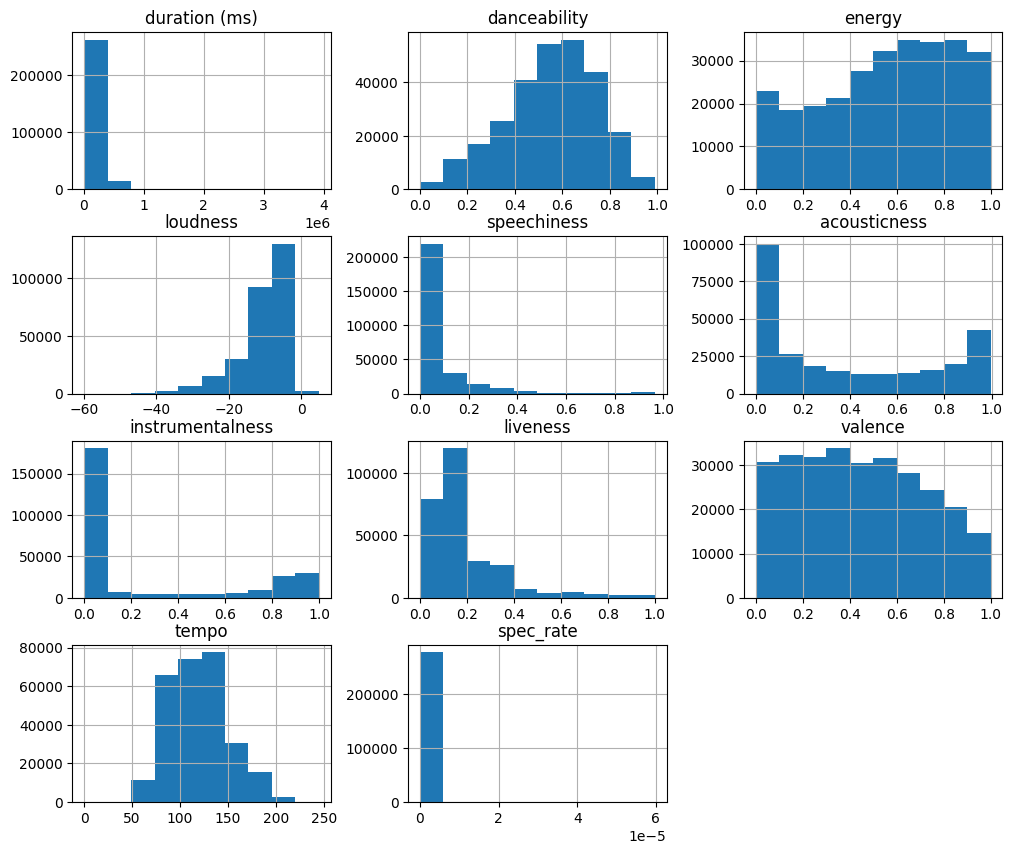

In [35]:
X.hist(figsize=(12, 10))
plt.show()

### Feature Distribution Notes
- Duration_ms shows a strongly right-skewed distribution, indicating that most tracks have moderate lengths while a small number of tracks are significantly longer.
- Danceability exhibits a relatively symmetric distribution centered around mid-range values, suggesting balanced variation in rhythmic suitability across tracks.
- Energy is slightly left-skewed with values concentrated at higher levels, reflecting that many tracks in the dataset are perceived as energetic.
- Loudness follows a left-skewed distribution consistent with decibel scaling and contains valid extreme values corresponding to quieter tracks.
- Speechiness shows a highly right-skewed distribution with a long tail, indicating that most tracks contain minimal spoken content.
- Acousticness displays a wide and bimodal-like distribution, suggesting a mixture of highly acoustic and highly electronic tracks.
- Instrumentalness is zero-inflated, with most tracks containing vocals and a smaller subset being purely instrumental.
- Liveness is right-skewed, reflecting the dominance of studio recordings over live performances.
- Valence exhibits a broad and relatively uniform distribution, indicating diverse emotional tones across the dataset.
- Tempo follows an approximately normal distribution centered around common popular music tempos.
- Spec_rate shows a highly right-skewed distribution with values concentrated near zero, suggesting the need for careful scaling during preprocessing.

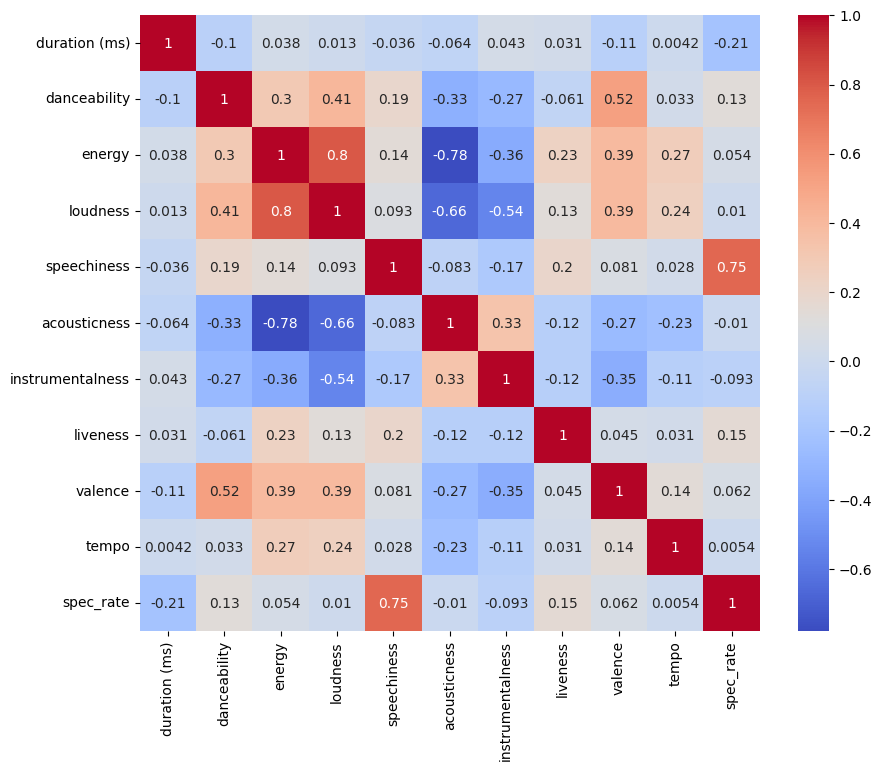

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.show()

### Correlation Insights
- The correlation analysis reveals several meaningful relationships among audio features.
- Energy and loudness exhibit a strong positive correlation, reflecting their shared association with perceived intensity. 
- Acousticness shows strong negative correlation with energy and loudness, indicating that highly acoustic tracks tend to be less intense.
- Danceability and valence are moderately correlated, suggesting a relationship between rhythmic suitability and emotional positivity.
- Most other feature pairs display low correlations, indicating limited multicollinearity and suggesting that many features may provide complementary information for modeling.



In [37]:
# Remove spec_rate column.
X = X.drop('spec_rate', axis=1)


In [38]:
X.head()

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917


In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

features = [
    "danceability", "energy", "loudness",
    "speechiness", "acousticness", "instrumentalness",
    "liveness", "valence", "tempo"
]

# ensure y is categorical for x-axis
y_cat = pd.Series(y).astype(str)

rows, cols = 3, 3
fig = make_subplots(
    rows=rows, cols=cols,
    subplot_titles=[f"<i>{f}</i>" for f in features]
)

for i, feat in enumerate(features):
    r = i // cols + 1
    c = i % cols + 1
    fig.add_trace(
        go.Box(name=feat, x=y_cat, y=X[feat]),
        row=r, col=c
    )

fig.update_layout(
    height=900,
    width=900,
    title_text="<b>Feature Distributions Across Labels</b>",
    title_x=0.5,
    showlegend=False
)

pio.renderers.default = "browser"
fig.show()

### Boxplot Insights by Label

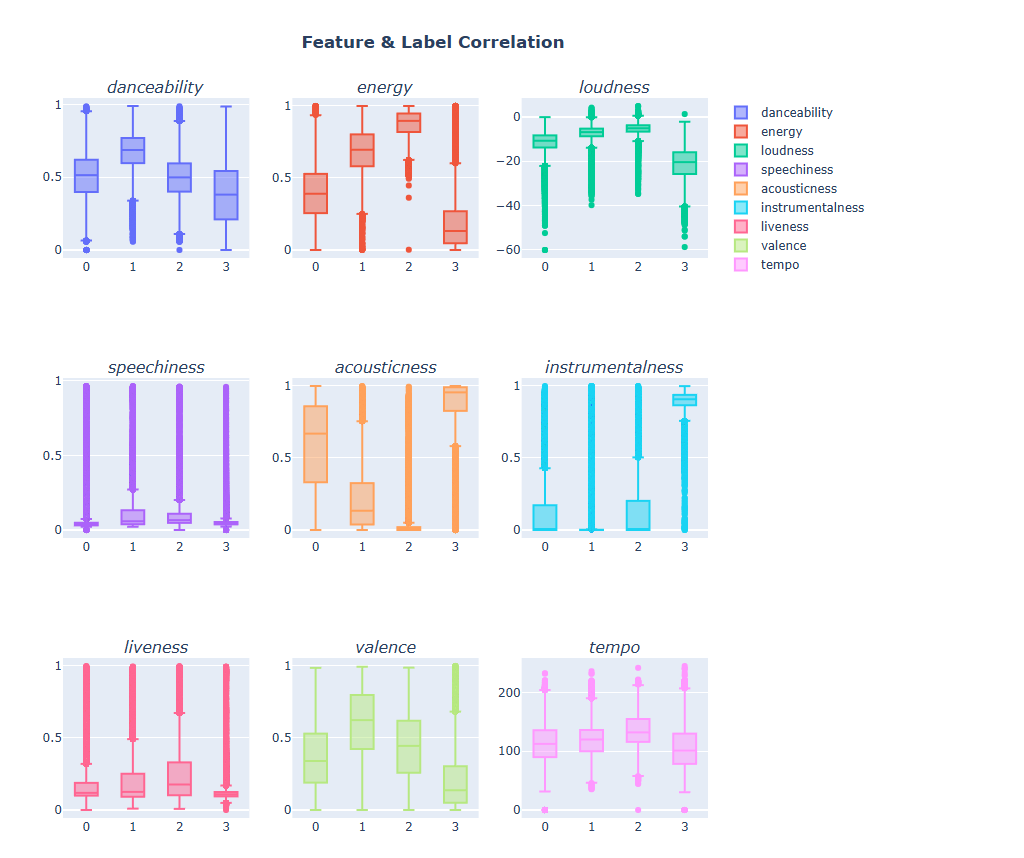
- The boxplots reveal clear distributional differences across mood labels for several audio features.
- Energy, loudness, valence, danceability, and acousticness exhibit strong median shifts, indicating high discriminative potential. 
- Instrumentalness and tempo also show meaningful label-dependent patterns, particularly for calm and energetic moods. 
- In contrast, speechiness and liveness display substantial overlap across labels, suggesting weaker standalone predictive power but potential complementary value when combined with other features.


## 2.2 Data Preparation & Feature Engineering

- The dataset contains no missing values, and zero values were verified as valid domain-specific measurements, therefore, no imputation was required.
- All input features are numerical Spotify audio descriptors, so no categorical encoding was applied. 
- Due to differences in feature scales, StandardScaler was used after the train-validation split to prevent data leakage. 
- Limited, domain-driven feature engineering was performed on skewed features to improve model stability while preserving interpretability.


In [40]:
feature_cols = [
    "duration (ms)", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "spec_rate"
]
def add_features(X_in):
    if not isinstance(X_in, pd.DataFrame):
        X_in = pd.DataFrame(X_in, columns=feature_cols)

    X_ = X_in.copy()
    X_["intensity"] = X_["energy"] * (-X_["loudness"])
    X_["rhythm_drive"] = X_["danceability"] * X_["tempo"]
    X_["calm_score"] = X_["acousticness"] + X_["instrumentalness"]
    return X_

## 3. Modeling Prototypes

Quick baselines and diagnostics to validate feature choices and data prep.


In [41]:
import sys
!"{sys.executable}" -m pip install -U scikit-learn

### Baseline: Logistic Regression + Feature Engineering

Adds domain features, scales inputs, and reports Macro F1 with a classification report.


In [42]:
results = []  # global list

def log_result(model_name, train_f1, val_f1, test_f1, best_param=None, notes=None):
    results.append({
        "model": model_name,
        "train_macro_f1": float(train_f1),
        "val_macro_f1": float(val_f1),
        "test_macro_f1": float(test_f1),
        "gap_train_val": float(train_f1 - val_f1),
        "best_param": best_param,
        "notes": notes
    })

Train: (194556, 10) Val: (41691, 10) Test: (41691, 10)
Class weights (info): {0: 0.8467645061889592, 1: 0.6528724832214765, 2: 1.47636970708757, 3: 1.6393326592517694}


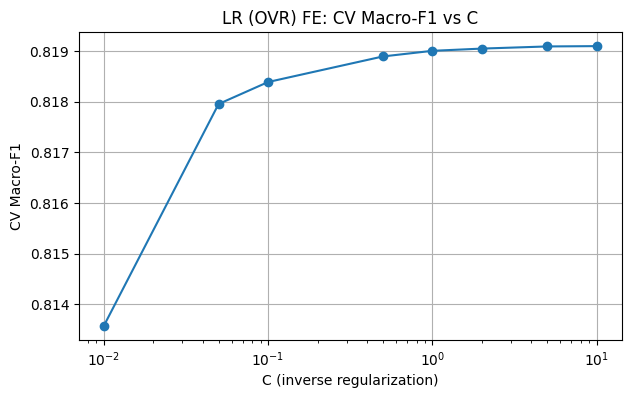

[FE] Best C: 10.0 | Best CV Macro-F1: 0.8191


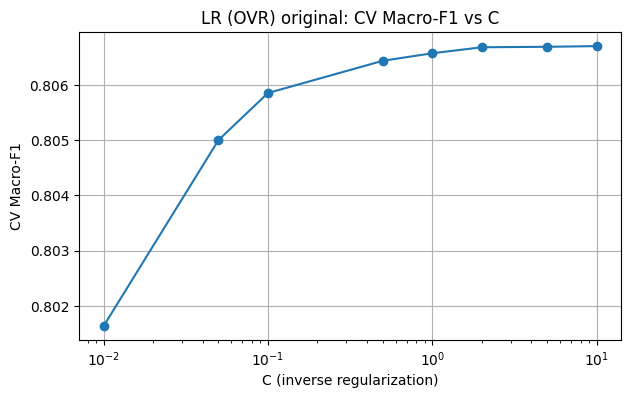

[original] Best C: 10.0 | Best CV Macro-F1: 0.8067

=== LogReg_OVR_FE ===
Train Macro-F1: 0.8191
Val   Macro-F1: 0.8197
Test  Macro-F1: 0.8183
Gap (Train-Val): -0.0006

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     12309
           1       0.82      0.77      0.80     15964
           2       0.70      0.82      0.75      7060
           3       0.87      0.98      0.92      6358

    accuracy                           0.81     41691
   macro avg       0.81      0.84      0.82     41691
weighted avg       0.82      0.81      0.81     41691


[TEST] Classification report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80     12308
           1       0.83      0.77      0.80     15965
           2       0.70      0.83      0.76      7060
           3       0.86      0.97      0.91      6358

    accuracy                           0.81     41691
   macro a

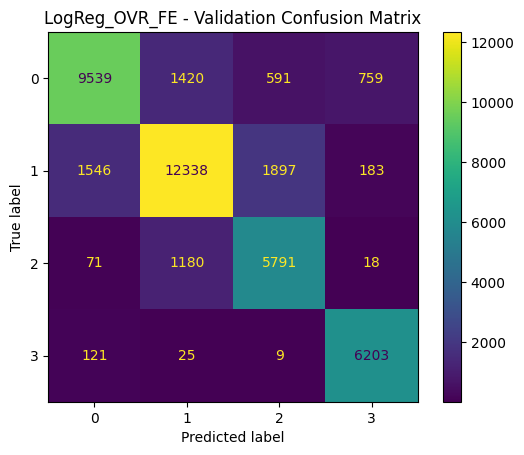

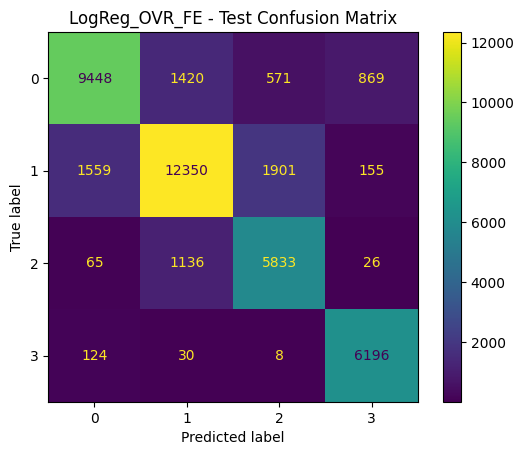


=== LogReg_OVR_original ===
Train Macro-F1: 0.8066
Val   Macro-F1: 0.8077
Test  Macro-F1: 0.8040
Gap (Train-Val): -0.0011

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79     12309
           1       0.81      0.76      0.78     15964
           2       0.69      0.81      0.74      7060
           3       0.86      0.98      0.91      6358

    accuracy                           0.80     41691
   macro avg       0.80      0.82      0.81     41691
weighted avg       0.80      0.80      0.80     41691


[TEST] Classification report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78     12308
           1       0.81      0.76      0.78     15965
           2       0.69      0.81      0.75      7060
           3       0.85      0.97      0.90      6358

    accuracy                           0.80     41691
   macro avg       0.79      0.82      0.80     41691
w

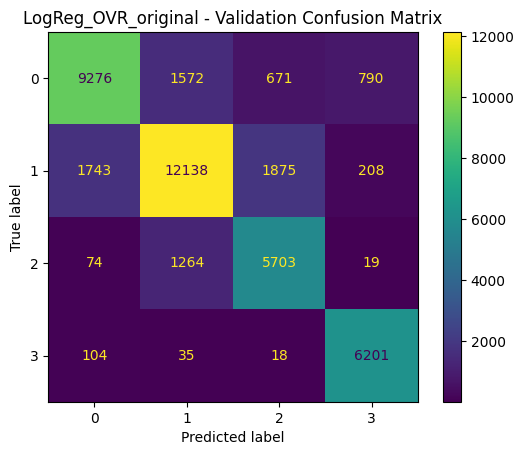

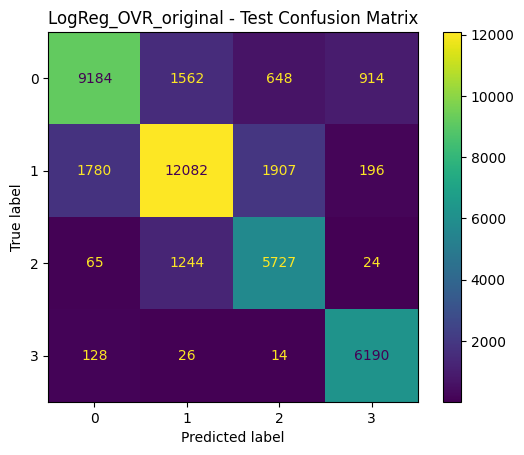

,Dataset,Train Macro-F1,Val Macro-F1,Test Macro-F1,Best C,Best CV Macro-F1
0,Feature-Engineered (FE),0.8191,0.8197,0.8183,10.0,0.8191
1,Original/original (original),0.8066,0.8077,0.8040,10.0,0.8067


,Metric,Δ (FE - original)
0,Train Macro-F1,0.0125
1,Val Macro-F1,0.0120
2,Test Macro-F1,0.0142


,Dataset,Train - Val Gap
0,FE,-0.0006
1,original,-0.0011


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from sklearn.base import clone

SEED = 42
np.random.seed(SEED)

# =========================
# (A) Ensure feature_cols + add_features exist
# =========================
# feature_cols = [...]
# def add_features(X_in): ...

feat_eng = FunctionTransformer(add_features, validate=False)

# =========================
# 1) Select features + target
# =========================
X = df[feature_cols].copy()
y = df["labels"].astype(int).copy()

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=SEED
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

# (info) class weights
classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
cw_map = {int(c): float(w) for c, w in zip(classes, cw)}
print("Class weights (info):", cw_map)

# =========================
# 2) Pipeline factories (FE vs original)
# =========================
def lr_pipe_factory_fe(C):
    base_lr = LogisticRegression(
        C=float(C),
        solver="liblinear",
        class_weight="balanced",
        max_iter=2000
    )
    return Pipeline([
        ("feat_eng", feat_eng),
        ("scaler", StandardScaler()),
        ("model", OneVsRestClassifier(base_lr))
    ])

def lr_pipe_factory_original(C):
    base_lr = LogisticRegression(
        C=float(C),
        solver="liblinear",
        class_weight="balanced",
        max_iter=2000
    )
    return Pipeline([
        ("feat_eng", "passthrough"),
        ("scaler", StandardScaler()),
        ("model", OneVsRestClassifier(base_lr))
    ])

# =========================
# 3) Tune C by CV Macro-F1 (no sample_weight)
# =========================
def cv_macro_f1_no_weights(pipe_factory, X, y, C_grid, cv):
    cv_scores = []
    for C in C_grid:
        pipe = pipe_factory(C)
        fold_scores = []

        for tr_idx, va_idx in cv.split(X, y):
            X_tr, X_va = X.iloc[tr_idx], X.iloc[va_idx]
            y_tr, y_va = y.iloc[tr_idx], y.iloc[va_idx]

            m = clone(pipe)
            m.fit(X_tr, y_tr)  # NO sample_weight (B1)
            y_hat = m.predict(X_va)
            fold_scores.append(f1_score(y_va, y_hat, average="macro"))

        cv_scores.append(float(np.mean(fold_scores)))

    best_idx = int(np.argmax(cv_scores))
    best_C = float(C_grid[best_idx])
    best_cv = float(cv_scores[best_idx])
    return best_C, best_cv, cv_scores

C_GRID = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# ----- Tune FE -----
best_C_fe, best_cv_fe, cv_scores_fe = cv_macro_f1_no_weights(
    lr_pipe_factory_fe, X_train, y_train, C_GRID, cv
)

plt.figure(figsize=(7,4))
plt.plot(C_GRID, cv_scores_fe, marker="o")
plt.xscale("log")
plt.xlabel("C (inverse regularization)")
plt.ylabel("CV Macro-F1")
plt.title("LR (OVR) FE: CV Macro-F1 vs C")
plt.grid(True)
plt.show()
print(f"[FE] Best C: {best_C_fe} | Best CV Macro-F1: {best_cv_fe:.4f}")

# ----- Tune original -----
best_C_original, best_cv_original, cv_scores_original = cv_macro_f1_no_weights(
    lr_pipe_factory_original, X_train, y_train, C_GRID, cv
)

plt.figure(figsize=(7,4))
plt.plot(C_GRID, cv_scores_original, marker="o")
plt.xscale("log")
plt.xlabel("C (inverse regularization)")
plt.ylabel("CV Macro-F1")
plt.title("LR (OVR) original: CV Macro-F1 vs C")
plt.grid(True)
plt.show()
print(f"[original] Best C: {best_C_original} | Best CV Macro-F1: {best_cv_original:.4f}")

# =========================
# 4) Fit final + Evaluate Train/Val/Test
# =========================
def fit_eval(pipe_factory, best_C, X_train, y_train, X_val, y_val, X_test, y_test, tag):
    pipe = pipe_factory(best_C)
    pipe.fit(X_train, y_train)

    y_tr = pipe.predict(X_train)
    y_va = pipe.predict(X_val)
    y_te = pipe.predict(X_test)

    tr_f1 = float(f1_score(y_train, y_tr, average="macro"))
    va_f1 = float(f1_score(y_val, y_va, average="macro"))
    te_f1 = float(f1_score(y_test, y_te, average="macro"))

    print(f"\n=== {tag} ===")
    print(f"Train Macro-F1: {tr_f1:.4f}")
    print(f"Val   Macro-F1: {va_f1:.4f}")
    print(f"Test  Macro-F1: {te_f1:.4f}")
    print(f"Gap (Train-Val): {tr_f1 - va_f1:+.4f}")

    print("\n[VAL] Classification report:")
    print(classification_report(y_val, y_va))

    print("\n[TEST] Classification report:")
    print(classification_report(y_test, y_te))

    ConfusionMatrixDisplay.from_predictions(y_val, y_va)
    plt.title(f"{tag} - Validation Confusion Matrix")
    plt.show()

    ConfusionMatrixDisplay.from_predictions(y_test, y_te)
    plt.title(f"{tag} - Test Confusion Matrix")
    plt.show()

    return {
        "pipe": pipe,
        "best_C": best_C,
        "best_cv_macro_f1": None,  # set later
        "train_macro_f1": tr_f1,
        "val_macro_f1": va_f1,
        "test_macro_f1": te_f1,
    }

lr_out_fe  = fit_eval(lr_pipe_factory_fe,  best_C_fe,  X_train, y_train, X_val, y_val, X_test, y_test, "LogReg_OVR_FE")
lr_out_original = fit_eval(lr_pipe_factory_original, best_C_original, X_train, y_train, X_val, y_val, X_test, y_test, "LogReg_OVR_original")

lr_out_fe["best_cv_macro_f1"]  = best_cv_fe
lr_out_original["best_cv_macro_f1"] = best_cv_original

# =========================
# 5) Comparison table: FE vs original
# =========================
compare_df = pd.DataFrame({
    "Dataset": ["Feature-Engineered (FE)", "Original/original (original)"],
    "Train Macro-F1": [lr_out_fe["train_macro_f1"], lr_out_original["train_macro_f1"]],
    "Val Macro-F1":   [lr_out_fe["val_macro_f1"],   lr_out_original["val_macro_f1"]],
    "Test Macro-F1":  [lr_out_fe["test_macro_f1"],  lr_out_original["test_macro_f1"]],
    "Best C":         [lr_out_fe["best_C"],         lr_out_original["best_C"]],
    "Best CV Macro-F1":[lr_out_fe["best_cv_macro_f1"], lr_out_original["best_cv_macro_f1"]],
}).round(4)
display(compare_df)

delta_df = pd.DataFrame({
    "Metric": ["Train Macro-F1", "Val Macro-F1", "Test Macro-F1"],
    "Δ (FE - original)": [
        lr_out_fe["train_macro_f1"] - lr_out_original["train_macro_f1"],
        lr_out_fe["val_macro_f1"]   - lr_out_original["val_macro_f1"],
        lr_out_fe["test_macro_f1"]  - lr_out_original["test_macro_f1"],
    ]
}).round(4)
display(delta_df)

gap_df = pd.DataFrame({
    "Dataset": ["FE", "original"],
    "Train - Val Gap": [
        lr_out_fe["train_macro_f1"] - lr_out_fe["val_macro_f1"],
        lr_out_original["train_macro_f1"] - lr_out_original["val_macro_f1"],
    ]
}).round(4)
display(gap_df)


### Tree-Based Models

Compares RandomForest, XGBoost, and LightGBM using train vs validation Macro F1.


In [ ]:
# ============================================================
# - Split train/val (stratified)
# - Compute sample_weight from class_weight (balanced) 
# - Pipeline: feature engineering + model # - 1) Baseline train/val Macro-F1 + gap table 
# - 2) Grid search over n_estimators for each model 
# -> pick smallest n within tolerance of best val Macro-F1 
# - 3) Plot curves (train/val vs n_estimators) per model 
# - 4) Fit final best-overall model using chosen n_estimators 
# ============================================================


import numpy as np
import pandas as pd
import random

from copy import deepcopy

from sklearn.model_selection import train_test_split, learning_curve, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
# -------------------------
# 0) Prepare X, y
# -------------------------
feature_cols = [
    "duration (ms)", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo",
]

X = df[feature_cols].copy()
y = df["labels"].astype(int).copy()

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=SEED
)

# sample_weight (balanced)
classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
cw_map = {int(c): float(w) for c, w in zip(classes, cw)}
train_sample_weight = y_train.map(cw_map).to_numpy()

print("Class weights:", cw_map)
# -------------------------
# 1) Feature engineering
# -------------------------
def add_features(X_in):
    X_ = X_in.copy()
    X_["intensity"] = X_["energy"] * (-X_["loudness"])
    X_["rhythm_drive"] = X_["danceability"] * X_["tempo"]
    X_["calm_score"] = X_["acousticness"] + X_["instrumentalness"]
    return X_

feat_eng = FunctionTransformer(add_features, validate=False)

def tune_n_estimators_cv_f1(pipe_factory, Xtr, ytr, n_grid, cv_splits=5):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=SEED)
    scores = []

    for n in n_grid:
        pipe = pipe_factory(n)
        cv_score = cross_val_score(
            pipe, Xtr, ytr,
            cv=cv,
            scoring="f1_macro",
            n_jobs=-1
        )
        scores.append(cv_score.mean())

    best_idx = int(np.argmax(scores))
    best_n = int(n_grid[best_idx])
    best_cv = float(scores[best_idx])

    plt.figure(figsize=(7,4))
    plt.plot(n_grid, scores, marker="o")
    plt.title("CV Macro-F1 vs n_estimators")
    plt.xlabel("n_estimators")
    plt.ylabel("CV Macro-F1")
    plt.grid(True)
    plt.show()

    return best_n, best_cv


def fit_val_test_macro_f1(pipe_factory, Xtr, ytr, Xva, yva, Xte, yte, n_grid, cv_splits=5, train_sample_weight=None): 
    best_n, best_cv = tune_n_estimators_cv_f1(pipe_factory, Xtr, ytr, n_grid, cv_splits=cv_splits) 
    pipe = pipe_factory(best_n) 
    fit_kwargs = {} 
    if train_sample_weight is not None: fit_kwargs["model__sample_weight"] = train_sample_weight # <-- pipeline param 
    pipe.fit(Xtr, ytr, **fit_kwargs) 

    tr_pred = pipe.predict(Xtr) 
    va_pred = pipe.predict(Xva) 
    te_pred = pipe.predict(Xte) 
    
    tr_f1 = float(f1_score(ytr, tr_pred, average="macro")) 
    va_f1 = float(f1_score(yva, va_pred, average="macro")) 
    te_f1 = float(f1_score(yte, te_pred, average="macro")) 
    
    print(f"Best n_estimators (CV): {best_n} | best CV Macro-F1: {best_cv:.4f}") 
    print(f"Train Macro-F1: {tr_f1:.4f} | Val Macro-F1: {va_f1:.4f} | Test Macro-F1: {te_f1:.4f}") 
    print(f"Gap (Train - Val): {tr_f1 - va_f1:.4f}") print("\n[VAL] Classification report:") 

    print(classification_report(yva, va_pred)) 

    print("\n[TEST] Classification report:") 
    print(classification_report(yte, te_pred)) 

    ConfusionMatrixDisplay.from_predictions(yva, va_pred) 
    plt.title("Validation Confusion Matrix") 
    plt.show() 

    ConfusionMatrixDisplay.from_predictions(yte, te_pred) 
    plt.title("Test Confusion Matrix") 
    plt.show() 
    return { "pipe": pipe, "best_n": best_n, "best_cv_macro_f1": best_cv, "train_macro_f1": tr_f1, "val_macro_f1": va_f1, "test_macro_f1": te_f1, }

Class weights: {0: 0.8467766505194528, 1: 0.6528722267244518, 2: 1.4763491979177732, 3: 1.639314046418355}


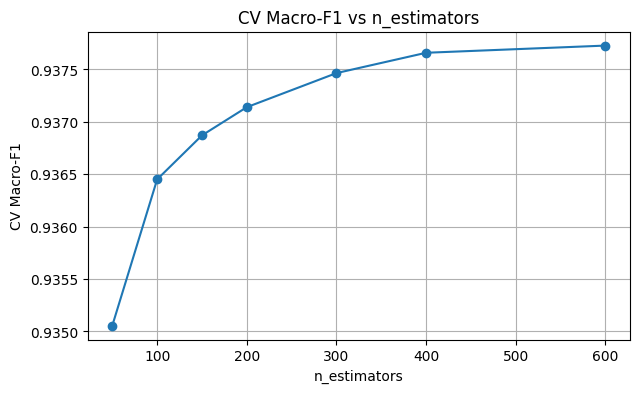

Best n_estimators (CV): 600 | best CV Macro-F1: 0.9377
Train Macro-F1: 1.0000 | Val Macro-F1: 0.9384 | Test Macro-F1: 0.9388
Gap (Train - Val): 0.0616

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8206
           1       0.92      0.95      0.93     10643
           2       0.92      0.89      0.90      4706
           3       0.97      0.97      0.97      4239

    accuracy                           0.94     27794
   macro avg       0.94      0.94      0.94     27794
weighted avg       0.94      0.94      0.94     27794


[TEST] Classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8206
           1       0.92      0.95      0.93     10643
           2       0.92      0.89      0.90      4707
           3       0.97      0.98      0.97      4238

    accuracy                           0.94     27794
   macro avg       0.94    

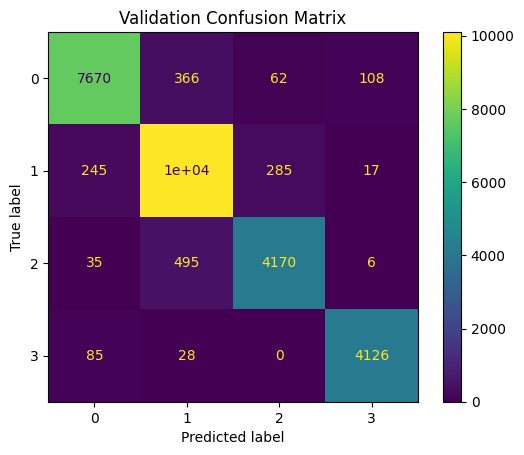

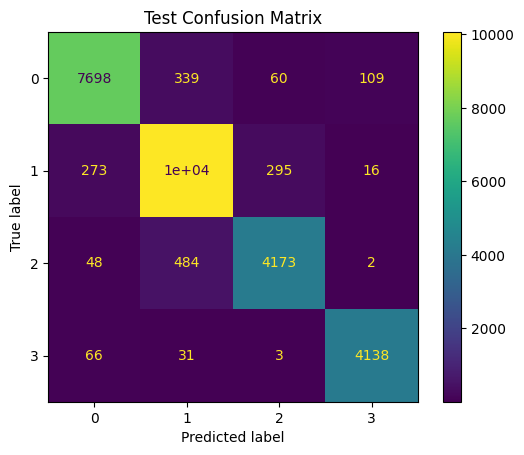

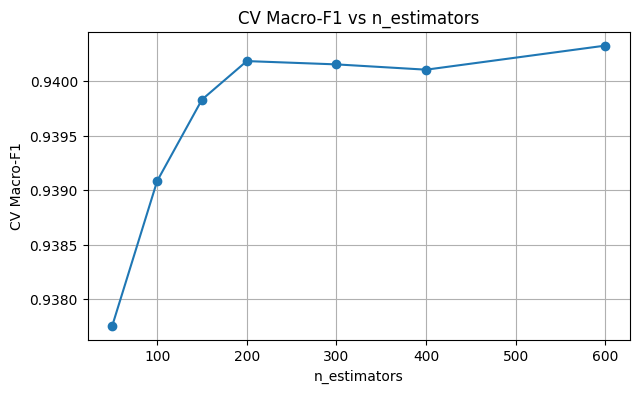

Best n_estimators (CV): 600 | best CV Macro-F1: 0.9403
Train Macro-F1: 1.0000 | Val Macro-F1: 0.9401 | Test Macro-F1: 0.9405
Gap (Train - Val): 0.0599

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8206
           1       0.92      0.95      0.93     10643
           2       0.92      0.89      0.91      4706
           3       0.97      0.97      0.97      4239

    accuracy                           0.94     27794
   macro avg       0.94      0.94      0.94     27794
weighted avg       0.94      0.94      0.94     27794


[TEST] Classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8206
           1       0.92      0.95      0.93     10643
           2       0.93      0.89      0.91      4707
           3       0.97      0.97      0.97      4238

    accuracy                           0.94     27794
   macro avg       0.94    

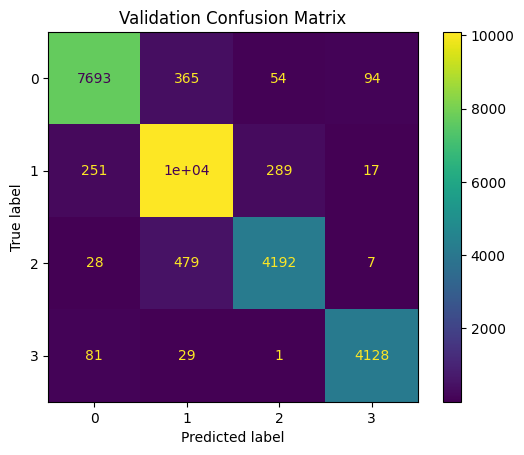

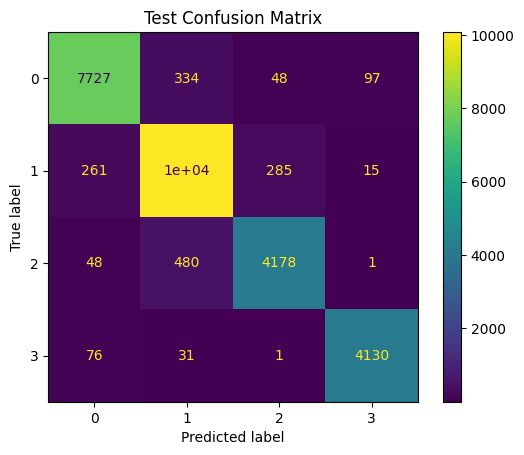

In [65]:
from sklearn.ensemble import RandomForestClassifier

def rf_pipe_factory_fe(n):
    return Pipeline([
        ("feat_eng", feat_eng),
        ("model", RandomForestClassifier(
            n_estimators=n, max_depth=None, min_samples_split=2,
            min_samples_leaf=1, max_features="sqrt", bootstrap=True,
            n_jobs=-1, random_state=SEED, class_weight=None
        ))
    ])

def rf_pipe_factory_original(n):
    return Pipeline([
        ("feat_eng", "passthrough"),
        ("model", RandomForestClassifier(
            n_estimators=n, max_depth=None, min_samples_split=2,
            min_samples_leaf=1, max_features="sqrt", bootstrap=True,
            n_jobs=-1, random_state=SEED, class_weight=None
        ))
    ])

RF_N_GRID = [50, 100, 150, 200, 300, 400, 600]

rf_out_fe = fit_val_test_macro_f1(
    rf_pipe_factory_fe, X_train, y_train, X_val, y_val, X_test, y_test,
    n_grid=RF_N_GRID, cv_splits=5, train_sample_weight=train_sample_weight
)
log_result("RandomForest_FE", rf_out_fe["train_macro_f1"], rf_out_fe["val_macro_f1"], rf_out_fe["test_macro_f1"],
           best_param=f"n={rf_out_fe['best_n']}")

rf_out_original = fit_val_test_macro_f1(
    rf_pipe_factory_original, X_train, y_train, X_val, y_val, X_test, y_test,
    n_grid=RF_N_GRID, cv_splits=5, train_sample_weight=train_sample_weight
)
log_result("RandomForest_original", rf_out_original["train_macro_f1"], rf_out_original["val_macro_f1"], rf_out_original["test_macro_f1"],
           best_param=f"n={rf_out_original['best_n']}")


In [69]:
import pandas as pd
import numpy as np

def _safe_float(x):
    try:
        return float(x)
    except Exception:
        return np.nan

# ====== 1) Results table ======
comparison_df = pd.DataFrame({
    "Dataset": ["Feature-Engineered (FE)", "Original"],
    "Train Macro-F1": [_safe_float(rf_out_fe.get("train_macro_f1")), _safe_float(rf_out_original.get("train_macro_f1"))],
    "Val Macro-F1":   [_safe_float(rf_out_fe.get("val_macro_f1")),   _safe_float(rf_out_original.get("val_macro_f1"))],
    "Test Macro-F1":  [_safe_float(rf_out_fe.get("test_macro_f1")),  _safe_float(rf_out_original.get("test_macro_f1"))],
    "Best n_estimators": [rf_out_fe.get("best_n"), rf_out_original.get("best_n")],
})

# Formatting: round
for c in ["Train Macro-F1", "Val Macro-F1", "Test Macro-F1"]:
    comparison_df[c] = comparison_df[c].round(4)

display(comparison_df)

# ====== 2) Difference table (FE - original) ======
delta_df = pd.DataFrame({
    "Metric": ["Train Macro-F1", "Val Macro-F1", "Test Macro-F1"],
    "Δ (FE - Original)": [
        _safe_float(rf_out_fe.get("train_macro_f1")) - _safe_float(rf_out_original.get("train_macro_f1")),
        _safe_float(rf_out_fe.get("val_macro_f1"))   - _safe_float(rf_out_original.get("val_macro_f1")),
        _safe_float(rf_out_fe.get("test_macro_f1"))  - _safe_float(rf_out_original.get("test_macro_f1")),
    ]
})
delta_df["Δ (FE - Original)"] = delta_df["Δ (FE - Original)"].round(4)
display(delta_df)

# ====== 3) Overfitting gap table (Train - Val) ======
gap_df = pd.DataFrame({
    "Dataset": ["FE", "original"],
    "Train - Val Gap": [
        _safe_float(rf_out_fe.get("train_macro_f1")) - _safe_float(rf_out_fe.get("val_macro_f1")),
        _safe_float(rf_out_original.get("train_macro_f1")) - _safe_float(rf_out_original.get("val_macro_f1")),
    ]
})
gap_df["Train - Val Gap"] = gap_df["Train - Val Gap"].round(4)
display(gap_df)

# ====== (Optional) Save CSV for report ======
# comparison_df.to_csv("rf_compare_fe_vs_original.csv", index=False)
# delta_df.to_csv("rf_delta_fe_minus_original.csv", index=False)
# gap_df.to_csv("rf_overfit_gap_fe_vs_original.csv", index=False)


,Dataset,Train Macro-F1,Val Macro-F1,Test Macro-F1,Best n_estimators
0,Feature-Engineered (FE),1.0,0.9384,0.9388,600
1,Original,1.0,0.9401,0.9405,600


,Metric,Δ (FE - Original)
0,Train Macro-F1,0.0000
1,Val Macro-F1,-0.0017
2,Test Macro-F1,-0.0018


,Dataset,Train - Val Gap
0,FE,0.0616
1,original,0.0599


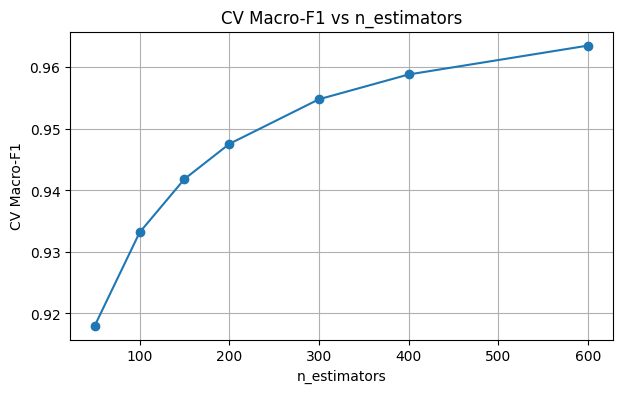

Best n_estimators (CV): 600 | best CV Macro-F1: 0.9635
Train Macro-F1: 0.9811 | Val Macro-F1: 0.9613 | Test Macro-F1: 0.9610
Gap (Train - Val): 0.0198

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8206
           1       0.97      0.94      0.96     10643
           2       0.91      0.97      0.94      4706
           3       0.97      0.99      0.98      4239

    accuracy                           0.96     27794
   macro avg       0.96      0.97      0.96     27794
weighted avg       0.96      0.96      0.96     27794


[TEST] Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8206
           1       0.97      0.94      0.96     10643
           2       0.91      0.97      0.94      4707
           3       0.98      0.99      0.98      4238

    accuracy                           0.96     27794
   macro avg       0.96    

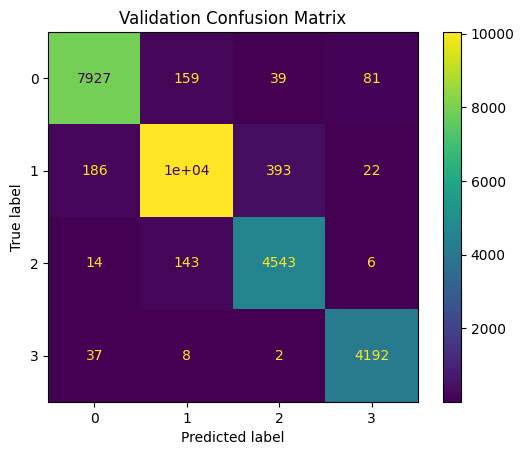

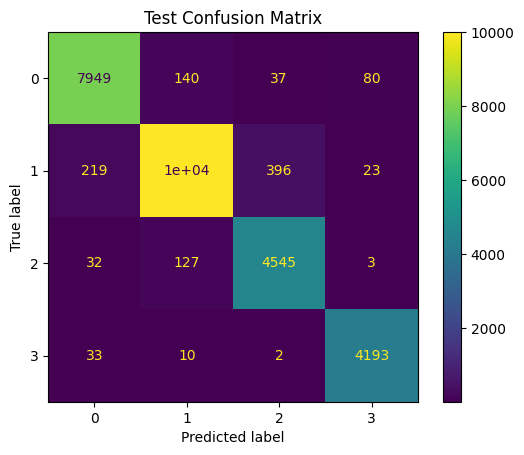

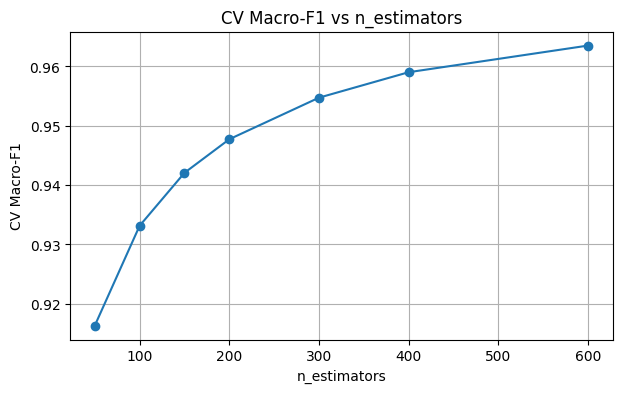

Best n_estimators (CV): 600 | best CV Macro-F1: 0.9635
Train Macro-F1: 0.9807 | Val Macro-F1: 0.9614 | Test Macro-F1: 0.9601
Gap (Train - Val): 0.0193

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8206
           1       0.97      0.94      0.96     10643
           2       0.91      0.97      0.94      4706
           3       0.97      0.99      0.98      4239

    accuracy                           0.96     27794
   macro avg       0.96      0.97      0.96     27794
weighted avg       0.96      0.96      0.96     27794


[TEST] Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8206
           1       0.97      0.94      0.96     10643
           2       0.91      0.97      0.94      4707
           3       0.97      0.99      0.98      4238

    accuracy                           0.96     27794
   macro avg       0.96    

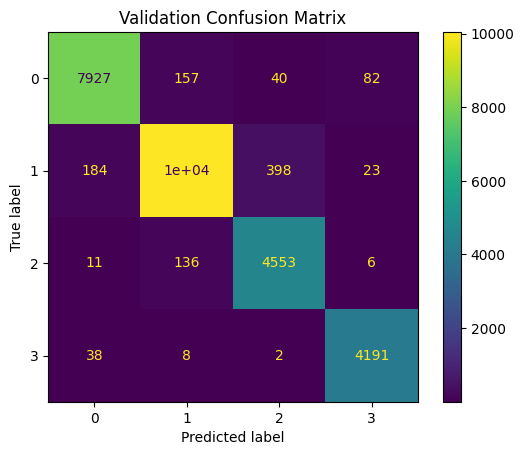

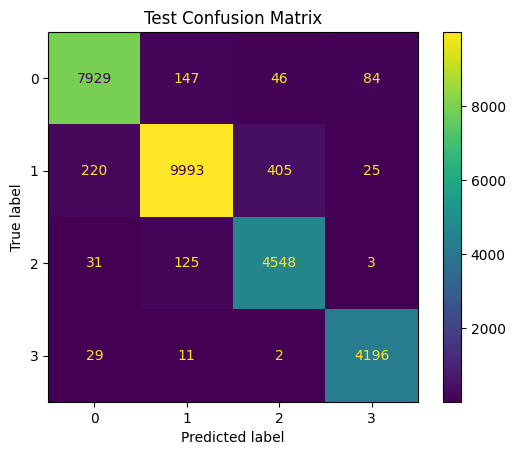

In [59]:
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

num_class = len(np.unique(y_train))

def xgb_pipe_factory_fe(n):
    return Pipeline([
        ("feat_eng", feat_eng),
        ("model", XGBClassifier(
            n_estimators=n,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.9,
            colsample_bytree=0.9,
            reg_lambda=1.0,
            objective="multi:softprob",
            num_class=num_class,
            eval_metric="mlogloss",
            tree_method="hist",
            random_state=SEED,
            n_jobs=-1
        ))
    ])

def xgb_pipe_factory_original(n):
    return Pipeline([
        ("feat_eng", "passthrough"),
        ("model", XGBClassifier(
            n_estimators=n,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.9,
            colsample_bytree=0.9,
            reg_lambda=1.0,
            objective="multi:softprob",
            num_class=num_class,
            eval_metric="mlogloss",
            tree_method="hist",
            random_state=SEED,
            n_jobs=-1
        ))
    ])

XGB_N_GRID = [50, 100, 150, 200, 300, 400, 600]

# ===== Train/Eval: FE =====
xgb_out_fe = fit_val_test_macro_f1(
    xgb_pipe_factory_fe,
    X_train, y_train, X_val, y_val, X_test, y_test,
    n_grid=XGB_N_GRID,
    cv_splits=5,
    train_sample_weight=train_sample_weight
)
log_result("XGBoost_FE",
           xgb_out_fe["train_macro_f1"], xgb_out_fe["val_macro_f1"], xgb_out_fe["test_macro_f1"],
           best_param=f"n={xgb_out_fe['best_n']}")

# ===== Train/Eval: original =====
xgb_out_original = fit_val_test_macro_f1(
    xgb_pipe_factory_original,
    X_train, y_train, X_val, y_val, X_test, y_test,
    n_grid=XGB_N_GRID,
    cv_splits=5,
    train_sample_weight=train_sample_weight
)
log_result("XGBoost_original",
           xgb_out_original["train_macro_f1"], xgb_out_original["val_macro_f1"], xgb_out_original["test_macro_f1"],
           best_param=f"n={xgb_out_original['best_n']}")


In [82]:
def _safe_float(x):
    try:
        return float(x)
    except Exception:
        return np.nan

# ====== 1) Results table ======
xgb_compare_df = pd.DataFrame({
    "Dataset": ["Feature-Engineered (FE)", "Original"],
    "Train Macro-F1": [_safe_float(xgb_out_fe.get("train_macro_f1")), _safe_float(xgb_out_original.get("train_macro_f1"))],
    "Val Macro-F1":   [_safe_float(xgb_out_fe.get("val_macro_f1")),   _safe_float(xgb_out_original.get("val_macro_f1"))],
    "Test Macro-F1":  [_safe_float(xgb_out_fe.get("test_macro_f1")),  _safe_float(xgb_out_original.get("test_macro_f1"))],
    "Best n_estimators": [xgb_out_fe.get("best_n"), xgb_out_original.get("best_n")],
})
for c in ["Train Macro-F1", "Val Macro-F1", "Test Macro-F1"]:
    xgb_compare_df[c] = xgb_compare_df[c].round(4)
display(xgb_compare_df)

# ====== 2) Difference table (FE - original) ======
xgb_delta_df = pd.DataFrame({
    "Metric": ["Train Macro-F1", "Val Macro-F1", "Test Macro-F1"],
    "Δ (FE - original)": [
        _safe_float(xgb_out_fe.get("train_macro_f1")) - _safe_float(xgb_out_original.get("train_macro_f1")),
        _safe_float(xgb_out_fe.get("val_macro_f1"))   - _safe_float(xgb_out_original.get("val_macro_f1")),
        _safe_float(xgb_out_fe.get("test_macro_f1"))  - _safe_float(xgb_out_original.get("test_macro_f1")),
    ]
})
xgb_delta_df["Δ (FE - original)"] = xgb_delta_df["Δ (FE - original)"].round(4)
display(xgb_delta_df)

# ====== 3) Overfitting gap (Train - Val) ======
xgb_gap_df = pd.DataFrame({
    "Dataset": ["FE", "original"],
    "Train - Val Gap": [
        _safe_float(xgb_out_fe.get("train_macro_f1")) - _safe_float(xgb_out_fe.get("val_macro_f1")),
        _safe_float(xgb_out_original.get("train_macro_f1")) - _safe_float(xgb_out_original.get("val_macro_f1")),
    ]
})
xgb_gap_df["Train - Val Gap"] = xgb_gap_df["Train - Val Gap"].round(4)
display(xgb_gap_df)

# (Optional) save
# xgb_compare_df.to_csv("xgb_compare_fe_vs_raw.csv", index=False)
# xgb_delta_df.to_csv("xgb_delta_fe_minus_raw.csv", index=False)
# xgb_gap_df.to_csv("xgb_overfit_gap_fe_vs_raw.csv", index=False)


,Dataset,Train Macro-F1,Val Macro-F1,Test Macro-F1,Best n_estimators
0,Feature-Engineered (FE),0.9811,0.9613,0.9610,600
1,Original,0.9807,0.9614,0.9601,600


,Metric,Δ (FE - original)
0,Train Macro-F1,0.0004
1,Val Macro-F1,-0.0002
2,Test Macro-F1,0.0009


,Dataset,Train - Val Gap
0,FE,0.0198
1,original,0.0193


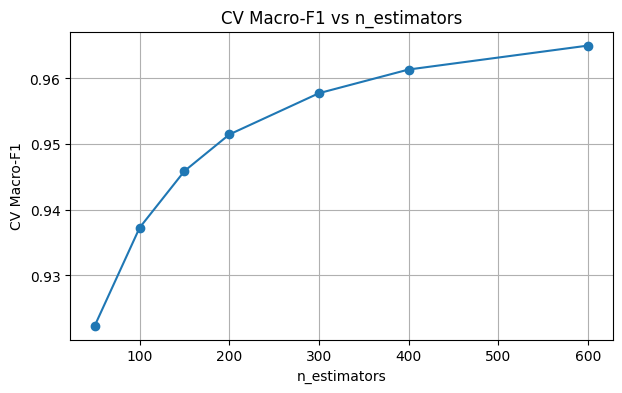

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3313
[LightGBM] [Info] Number of data points in the train set: 222350, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Best n_estimators (CV): 600 | best CV Macro-F1: 0.9650
Train Macro-F1: 0.9860 | Val Macro-F1: 0.9635 | Test Macro-F1: 0.9629
Gap (Train - Val): 0.0225

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8206
           1       0.97      0.95      0.96     10643
           2       0.92      0.97      0.94      4706
           3    

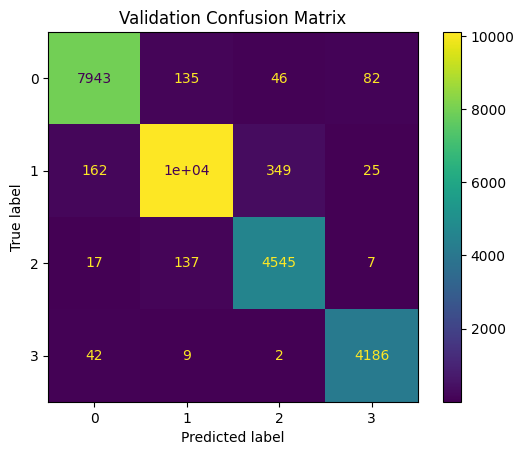

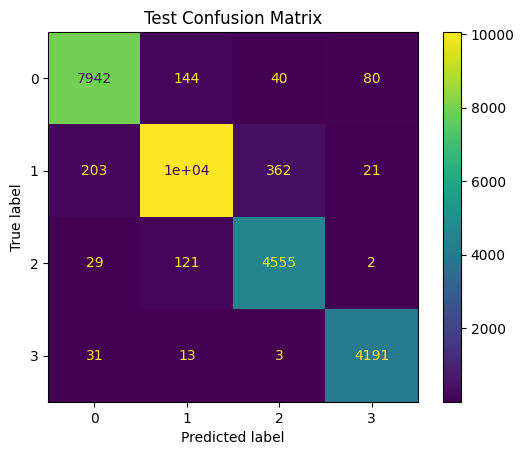

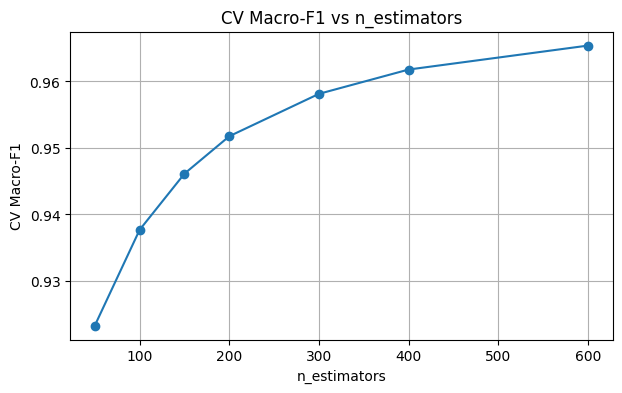

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2548
[LightGBM] [Info] Number of data points in the train set: 222350, number of used features: 10
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
Best n_estimators (CV): 600 | best CV Macro-F1: 0.9654
Train Macro-F1: 0.9860 | Val Macro-F1: 0.9639 | Test Macro-F1: 0.9635
Gap (Train - Val): 0.0221

[VAL] Classification report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8206
           1       0.97      0.95      0.96     10643
           2       0.92      0.97      0.94      4706
           3    

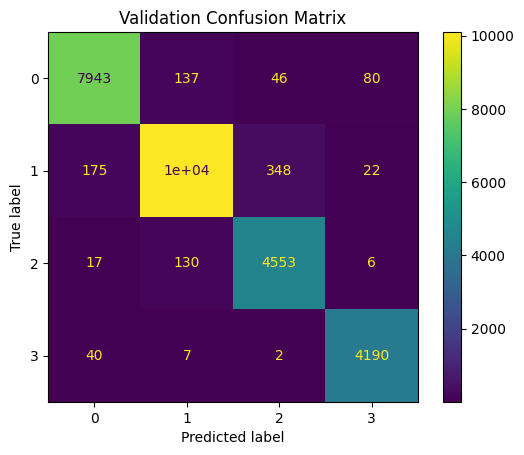

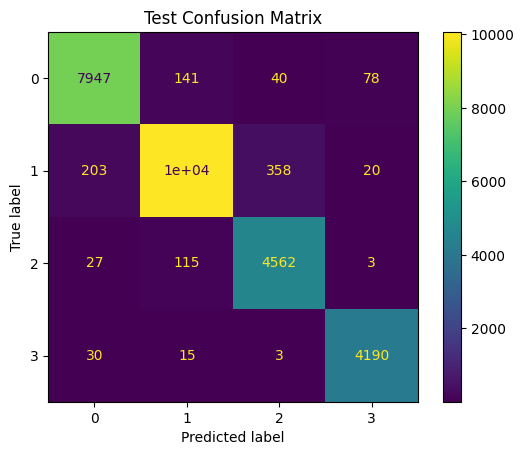

In [63]:
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd

def lgbm_pipe_factory_fe(n):
    return Pipeline([
        ("feat_eng", feat_eng),
        ("model", LGBMClassifier(
            n_estimators=n,
            learning_rate=0.03,
            num_leaves=61,
            subsample=0.9,
            colsample_bytree=0.9,
            max_depth=8,
            reg_lambda=1.2,
            objective="multiclass",
            random_state=SEED,
            n_jobs=-1
        ))
    ])

def lgbm_pipe_factory_original(n):
    return Pipeline([
        ("feat_eng", "passthrough"),
        ("model", LGBMClassifier(
            n_estimators=n,
            learning_rate=0.03,
            num_leaves=61,
            subsample=0.9,
            colsample_bytree=0.9,
            max_depth=8,
            reg_lambda=1.2,
            objective="multiclass",
            random_state=SEED,
            n_jobs=-1
        ))
    ])

LGBM_N_GRID = [50, 100, 150, 200, 300, 400, 600]

# ===== Train/Eval: FE =====
lgbm_out_fe = fit_val_test_macro_f1(
    lgbm_pipe_factory_fe,
    X_train, y_train, X_val, y_val, X_test, y_test,
    n_grid=LGBM_N_GRID,
    cv_splits=5,
    train_sample_weight=train_sample_weight
)
log_result("LightGBM_FE",
           lgbm_out_fe["train_macro_f1"], lgbm_out_fe["val_macro_f1"], lgbm_out_fe["test_macro_f1"],
           best_param=f"n={lgbm_out_fe['best_n']}")

# ===== Train/Eval: original =====
lgbm_out_original = fit_val_test_macro_f1(
    lgbm_pipe_factory_original,
    X_train, y_train, X_val, y_val, X_test, y_test,
    n_grid=LGBM_N_GRID,
    cv_splits=5,
    train_sample_weight=train_sample_weight
)
log_result("LightGBM_original",
           lgbm_out_original["train_macro_f1"], lgbm_out_original["val_macro_f1"], lgbm_out_original["test_macro_f1"],
           best_param=f"n={lgbm_out_original['best_n']}")


In [83]:
def _safe_float(x):
    try:
        return float(x)
    except Exception:
        return np.nan

# ====== 1) Results table ======
lgbm_compare_df = pd.DataFrame({
    "Dataset": ["Feature-Engineered (FE)", "Original "],
    "Train Macro-F1": [_safe_float(lgbm_out_fe.get("train_macro_f1")), _safe_float(lgbm_out_original.get("train_macro_f1"))],
    "Val Macro-F1":   [_safe_float(lgbm_out_fe.get("val_macro_f1")),   _safe_float(lgbm_out_original.get("val_macro_f1"))],
    "Test Macro-F1":  [_safe_float(lgbm_out_fe.get("test_macro_f1")),  _safe_float(lgbm_out_original.get("test_macro_f1"))],
    "Best n_estimators": [lgbm_out_fe.get("best_n"), lgbm_out_original.get("best_n")],
})
for c in ["Train Macro-F1", "Val Macro-F1", "Test Macro-F1"]:
    lgbm_compare_df[c] = lgbm_compare_df[c].round(4)
display(lgbm_compare_df)

# ====== 2) Difference table (FE - original) ======
lgbm_delta_df = pd.DataFrame({
    "Metric": ["Train Macro-F1", "Val Macro-F1", "Test Macro-F1"],
    "Δ (FE - original)": [
        _safe_float(lgbm_out_fe.get("train_macro_f1")) - _safe_float(lgbm_out_original.get("train_macro_f1")),
        _safe_float(lgbm_out_fe.get("val_macro_f1"))   - _safe_float(lgbm_out_original.get("val_macro_f1")),
        _safe_float(lgbm_out_fe.get("test_macro_f1"))  - _safe_float(lgbm_out_original.get("test_macro_f1")),
    ]
})
lgbm_delta_df["Δ (FE - original)"] = lgbm_delta_df["Δ (FE - original)"].round(4)
display(lgbm_delta_df)

# ====== 3) Overfitting gap (Train - Val) ======
lgbm_gap_df = pd.DataFrame({
    "Dataset": ["FE", "original"],
    "Train - Val Gap": [
        _safe_float(lgbm_out_fe.get("train_macro_f1")) - _safe_float(lgbm_out_fe.get("val_macro_f1")),
        _safe_float(lgbm_out_original.get("train_macro_f1")) - _safe_float(lgbm_out_original.get("val_macro_f1")),
    ]
})
lgbm_gap_df["Train - Val Gap"] = lgbm_gap_df["Train - Val Gap"].round(4)
display(lgbm_gap_df)

# (Optional) save
# lgbm_compare_df.to_csv("lgbm_compare_fe_vs_original.csv", index=False)
# lgbm_delta_df.to_csv("lgbm_delta_fe_minus_original.csv", index=False)
# lgbm_gap_df.to_csv("lgbm_overfit_gap_fe_vs_original.csv", index=False)


,Dataset,Train Macro-F1,Val Macro-F1,Test Macro-F1,Best n_estimators
0,Feature-Engineered (FE),0.986,0.9635,0.9629,600
1,Original,0.986,0.9639,0.9635,600


,Metric,Δ (FE - original)
0,Train Macro-F1,0.0001
1,Val Macro-F1,-0.0003
2,Test Macro-F1,-0.0006


,Dataset,Train - Val Gap
0,FE,0.0225
1,original,0.0221


### Neural Network: PyTorch MLP

A simple MLP with class-weighted loss, optional feature engineering, and validation reporting.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

SEED = 42
BATCH_SIZE = 1024
VAL_BATCH_SIZE = 4096
EPOCHS = 25
LR = 1e-3
WEIGHT_DECAY = 1e-4
PATIENCE = 5

BASE_FEATURES = [
    "duration (ms)", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo",
]
TARGET_COL = "labels"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

def set_seed(seed: int):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

def run_mlp_experiment(df, use_fe: bool, seed: int = 42):
    set_seed(seed)

    # 1) BUILD X, y + FE
    X = df[BASE_FEATURES].copy()
    y = df[TARGET_COL].astype(int).copy()

    if use_fe:
        X["intensity"] = X["energy"] * (-X["loudness"])
        X["rhythm_drive"] = X["danceability"] * X["tempo"]
        X["calm_score"] = X["acousticness"] + X["instrumentalness"]

    feature_cols = list(X.columns)

    # 2) Split 80/10/10 stratified
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.20, stratify=y, random_state=seed
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=seed
    )

    classes = np.unique(y_train)
    num_classes = len(classes)

    # 3) Scale
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)
    X_test_s  = scaler.transform(X_test)

    # 4) Loaders
    X_train_t = torch.tensor(X_train_s, dtype=torch.float32)
    y_train_t = torch.tensor(y_train.values, dtype=torch.long)
    X_val_t   = torch.tensor(X_val_s, dtype=torch.float32)
    y_val_t   = torch.tensor(y_val.values, dtype=torch.long)
    X_test_t  = torch.tensor(X_test_s, dtype=torch.float32)
    y_test_t  = torch.tensor(y_test.values, dtype=torch.long)

    train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=BATCH_SIZE, shuffle=True)
    val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t),     batch_size=VAL_BATCH_SIZE, shuffle=False)
    test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t),   batch_size=VAL_BATCH_SIZE, shuffle=False)

    num_features = X_train_t.shape[1]

    # 5) Model
    class MLP(nn.Module):
        def __init__(self, in_dim, out_dim):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(in_dim, 128), nn.ReLU(), nn.Dropout(0.25),
                nn.Linear(128, 64), nn.ReLU(), nn.Dropout(0.20),
                nn.Linear(64, 32), nn.ReLU(), nn.Dropout(0.15),
                nn.Linear(32, out_dim)
            )
        def forward(self, x): return self.net(x)

    model = MLP(num_features, num_classes).to(device)

    # 6) Loss + optim
    class_w = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
    class_w_t = torch.tensor(class_w, dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_w_t)
    optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)

    # 7) Eval
    def eval_loader(loader):
        model.eval()
        all_preds, all_true = [], []
        total_loss, total_n = 0.0, 0

        with torch.no_grad():
            for xb, yb in loader:
                xb, yb = xb.to(device), yb.to(device)
                logits = model(xb)
                loss = criterion(logits, yb)
                preds = torch.argmax(logits, dim=1)

                all_preds.append(preds.cpu().numpy())
                all_true.append(yb.cpu().numpy())

                bs = yb.size(0)
                total_loss += loss.item() * bs
                total_n += bs

        y_pred = np.concatenate(all_preds)
        y_true = np.concatenate(all_true)
        return float(total_loss/max(total_n,1)), float(f1_score(y_true, y_pred, average="macro")), y_true, y_pred

    # 8) Train loop
    history = {"train_loss": [], "val_loss": [], "train_f1": [], "val_f1": []}
    best_val_f1, best_state = -1.0, None
    patience_left = PATIENCE

    for epoch in range(1, EPOCHS+1):
        model.train()
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            loss = criterion(model(xb), yb)
            loss.backward()
            optimizer.step()

        tr_loss, tr_f1, _, _ = eval_loader(train_loader)
        va_loss, va_f1, _, _ = eval_loader(val_loader)

        history["train_loss"].append(tr_loss)
        history["val_loss"].append(va_loss)
        history["train_f1"].append(tr_f1)
        history["val_f1"].append(va_f1)

        if va_f1 > best_val_f1 + 1e-6:
            best_val_f1 = va_f1
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            patience_left = PATIENCE
        else:
            patience_left -= 1

        print(f"[{'FE' if use_fe else 'Original'}] Epoch {epoch:02d} | "
              f"Train F1 {tr_f1:.4f} | Val F1 {va_f1:.4f} | Gap {tr_f1 - va_f1:+.4f}")

        if PATIENCE is not None and patience_left <= 0:
            break

    if best_state is not None:
        model.load_state_dict(best_state)

    tr_loss, tr_f1, _, _ = eval_loader(train_loader)
    va_loss, va_f1, va_true, va_pred = eval_loader(val_loader)
    te_loss, te_f1, te_true, te_pred = eval_loader(test_loader)

    return {
        "use_fe": use_fe,
        "feature_cols": feature_cols,
        "train_macro_f1": tr_f1, "val_macro_f1": va_f1, "test_macro_f1": te_f1,
        "gap_train_val": tr_f1 - va_f1,
        "history": history,
        "val_report": classification_report(va_true, va_pred, digits=4),
        "val_cm": confusion_matrix(va_true, va_pred),
        "test_report": classification_report(te_true, te_pred, digits=4),
        "test_cm": confusion_matrix(te_true, te_pred),
    }



Device: cpu


In [75]:
mlp_out_fe  = run_mlp_experiment(df, use_fe=True,  seed=SEED)
mlp_out_original = run_mlp_experiment(df, use_fe=False, seed=SEED)


[FE] Epoch 01 | Train F1 0.8326 | Val F1 0.8329 | Gap -0.0003
[FE] Epoch 02 | Train F1 0.8598 | Val F1 0.8599 | Gap -0.0002
[FE] Epoch 03 | Train F1 0.8533 | Val F1 0.8522 | Gap +0.0011
[FE] Epoch 04 | Train F1 0.8671 | Val F1 0.8664 | Gap +0.0008
[FE] Epoch 05 | Train F1 0.8747 | Val F1 0.8741 | Gap +0.0006
[FE] Epoch 06 | Train F1 0.8740 | Val F1 0.8738 | Gap +0.0002
[FE] Epoch 07 | Train F1 0.8810 | Val F1 0.8806 | Gap +0.0004
[FE] Epoch 08 | Train F1 0.8828 | Val F1 0.8807 | Gap +0.0021
[FE] Epoch 09 | Train F1 0.8851 | Val F1 0.8828 | Gap +0.0023
[FE] Epoch 10 | Train F1 0.8837 | Val F1 0.8818 | Gap +0.0019
[FE] Epoch 11 | Train F1 0.8848 | Val F1 0.8829 | Gap +0.0019
[FE] Epoch 12 | Train F1 0.8886 | Val F1 0.8860 | Gap +0.0025
[FE] Epoch 13 | Train F1 0.8904 | Val F1 0.8879 | Gap +0.0025
[FE] Epoch 14 | Train F1 0.8907 | Val F1 0.8876 | Gap +0.0031
[FE] Epoch 15 | Train F1 0.8915 | Val F1 0.8873 | Gap +0.0042
[FE] Epoch 16 | Train F1 0.8965 | Val F1 0.8931 | Gap +0.0034
[FE] Epo

,Dataset,Train Macro-F1,Val Macro-F1,Test Macro-F1,Epochs (ran),Train-Val Gap
0,Feature-Engineered (FE),0.8976,0.8939,0.8946,23,0.0037
1,Original/original (original),0.9009,0.8975,0.8981,25,0.0034


,Metric,Δ (FE - original)
0,Train Macro-F1,-0.0033
1,Val Macro-F1,-0.0036
2,Test Macro-F1,-0.0035



===== [FE] VAL report =====
               precision    recall  f1-score   support

           0     0.9137    0.8881    0.9008      8206
           1     0.8983    0.8519    0.8745     10643
           2     0.7987    0.9023    0.8473      4706
           3     0.9349    0.9722    0.9532      4239

    accuracy                         0.8895     27794
   macro avg     0.8864    0.9036    0.8939     27794
weighted avg     0.8916    0.8895    0.8896     27794

[FE] VAL CM:
 [[7288  594  113  211]
 [ 555 9067  951   70]
 [  31  423 4246    6]
 [ 102   10    6 4121]]

===== [FE] TEST report =====
               precision    recall  f1-score   support

           0     0.9132    0.8902    0.9016      8206
           1     0.8976    0.8510    0.8737     10643
           2     0.7981    0.9001    0.8460      4707
           3     0.9397    0.9748    0.9569      4238

    accuracy                         0.8898     27794
   macro avg     0.8872    0.9040    0.8946     27794
weighted avg     

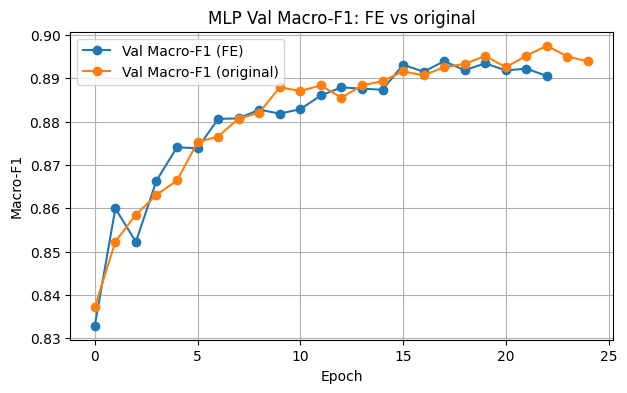

In [76]:
log_result("MLP_FE (PyTorch)",  mlp_out_fe["train_macro_f1"],  mlp_out_fe["val_macro_f1"],  mlp_out_fe["test_macro_f1"],
           best_param=f"epochs={len(mlp_out_fe['history']['val_f1'])}", notes="best by val f1")
log_result("MLP_original (PyTorch)", mlp_out_original["train_macro_f1"], mlp_out_original["val_macro_f1"], mlp_out_original["test_macro_f1"],
           best_param=f"epochs={len(mlp_out_original['history']['val_f1'])}", notes="best by val f1")

# ====== Comparison table ======
compare_df = pd.DataFrame({
    "Dataset": ["Feature-Engineered (FE)", "Original/original (original)"],
    "Train Macro-F1": [mlp_out_fe["train_macro_f1"], mlp_out_original["train_macro_f1"]],
    "Val Macro-F1":   [mlp_out_fe["val_macro_f1"],   mlp_out_original["val_macro_f1"]],
    "Test Macro-F1":  [mlp_out_fe["test_macro_f1"],  mlp_out_original["test_macro_f1"]],
    "Epochs (ran)":   [len(mlp_out_fe["history"]["val_f1"]), len(mlp_out_original["history"]["val_f1"])],
    "Train-Val Gap":  [mlp_out_fe["gap_train_val"], mlp_out_original["gap_train_val"]],
})
for c in ["Train Macro-F1", "Val Macro-F1", "Test Macro-F1", "Train-Val Gap"]:
    compare_df[c] = pd.to_numeric(compare_df[c]).round(4)
display(compare_df)

delta_df = pd.DataFrame({
    "Metric": ["Train Macro-F1", "Val Macro-F1", "Test Macro-F1"],
    "Δ (FE - original)": [
        mlp_out_fe["train_macro_f1"] - mlp_out_original["train_macro_f1"],
        mlp_out_fe["val_macro_f1"]   - mlp_out_original["val_macro_f1"],
        mlp_out_fe["test_macro_f1"]  - mlp_out_original["test_macro_f1"],
    ]
})
delta_df["Δ (FE - original)"] = delta_df["Δ (FE - original)"].round(4)
display(delta_df)

print("\n===== [FE] VAL report =====\n", mlp_out_fe["val_report"])
print("[FE] VAL CM:\n", mlp_out_fe["val_cm"])
print("\n===== [FE] TEST report =====\n", mlp_out_fe["test_report"])
print("[FE] TEST CM:\n", mlp_out_fe["test_cm"])

print("\n===== [original] VAL report =====\n", mlp_out_original["val_report"])
print("[original] VAL CM:\n", mlp_out_original["val_cm"])
print("\n===== [original] TEST report =====\n", mlp_out_original["test_report"])
print("[original] TEST CM:\n", mlp_out_original["test_cm"])

plt.figure(figsize=(7,4))
plt.plot(mlp_out_fe["history"]["val_f1"], marker="o", label="Val Macro-F1 (FE)")
plt.plot(mlp_out_original["history"]["val_f1"], marker="o", label="Val Macro-F1 (original)")
plt.title("MLP Val Macro-F1: FE vs original")
plt.xlabel("Epoch")
plt.ylabel("Macro-F1")
plt.grid(True)
plt.legend()
plt.show()

### The comparision table of 5 models

In [ ]:
def pick_best_variant(model_name, out_fe, out_original, param_key_fe=None, param_key_original=None):
    """
    Pick the variant with higher val_macro_f1.
    Return a dict in the 'results' format.
    """
    fe_val  = out_fe["val_macro_f1"]
    original_val = out_original["val_macro_f1"]

    best = out_fe if fe_val >= original_val else out_original
    variant = "FE" if best is out_fe else "original"

    train_f1 = float(best["train_macro_f1"])
    val_f1   = float(best["val_macro_f1"])
    test_f1  = float(best["test_macro_f1"])

    d = {
        "model": f"{model_name}_{variant}",
        "train_macro_f1": train_f1,
        "val_macro_f1": val_f1,
        "test_macro_f1": test_f1,
        "gap_train_val": train_f1 - val_f1,
    }

    # optional best_param
    if "best_n" in best:
        d["best_param"] = f"n={best['best_n']}"
    elif "best_C" in best:
        d["best_param"] = f"C={best['best_C']}"
    elif "best_param" in best:
        d["best_param"] = str(best["best_param"])

    return d

results = []

# ===== RandomForest =====
results.append(pick_best_variant("RandomForest", rf_out_fe, rf_out_original))

# ===== Logistic Regression =====
# if your returned dict has key best_C, that's ok
results.append(pick_best_variant("LogReg", lr_out_fe, lr_out_original))

# ===== XGBoost =====
results.append(pick_best_variant("XGBoost", xgb_out_fe, xgb_out_original))

# ===== LightGBM =====
results.append(pick_best_variant("LightGBM", lgbm_out_fe, lgbm_out_original))

# ===== MLP (PyTorch) =====
# If your MLP output is mlp_out_fe/mlp_out_original as dicts:
# {"train_macro_f1":..., "val_macro_f1":..., "test_macro_f1":...}
results.append(pick_best_variant("MLP", mlp_out_fe, mlp_out_original))

# quick check
pd.DataFrame(results)


,model,train_macro_f1,val_macro_f1,test_macro_f1,gap_train_val,best_param
0,RandomForest_original,1.000000,0.940071,0.940550,0.059929,n=600
1,LogReg_FE,0.819113,0.819728,0.818262,-0.000615,C=10.0
2,XGBoost_original,0.980702,0.961445,0.960102,0.019257,n=600
3,LightGBM_original,0.985962,0.963889,0.963457,0.022072,n=600
4,MLP_original,0.900925,0.897506,0.898063,0.003419,NaN


In [79]:
summary = pd.DataFrame(results)
summary_sorted = summary.sort_values(["val_macro_f1", "test_macro_f1"], ascending=False).reset_index(drop=True)
display(summary_sorted)


,model,train_macro_f1,val_macro_f1,test_macro_f1,gap_train_val,best_param
0,LightGBM_original,0.985962,0.963889,0.963457,0.022072,n=600
1,XGBoost_original,0.980702,0.961445,0.960102,0.019257,n=600
2,RandomForest_original,1.000000,0.940071,0.940550,0.059929,n=600
3,MLP_original,0.900925,0.897506,0.898063,0.003419,NaN
4,LogReg_FE,0.819113,0.819728,0.818262,-0.000615,C=10.0


,model,variant,train_macro_f1,val_macro_f1,test_macro_f1,gap_train_val,best_param
0,LightGBM,FE,0.9860,0.9635,0.9629,0.0225,n=600
1,XGBoost,FE,0.9811,0.9613,0.9610,0.0198,n=600
2,RandomForest,FE,1.0000,0.9384,0.9388,0.0616,n=600
3,MLP,FE,0.8976,0.8939,0.8946,0.0037,
4,LogReg,FE,0.8191,0.8197,0.8183,-0.0006,C=10.0
5,LightGBM,ORIGINAL,0.9860,0.9639,0.9635,0.0221,n=600
6,XGBoost,ORIGINAL,0.9807,0.9614,0.9601,0.0193,n=600
7,RandomForest,ORIGINAL,1.0000,0.9401,0.9405,0.0599,n=600
8,MLP,ORIGINAL,0.9009,0.8975,0.8981,0.0034,
9,LogReg,ORIGINAL,0.8066,0.8077,0.8040,-0.0011,C=10.0


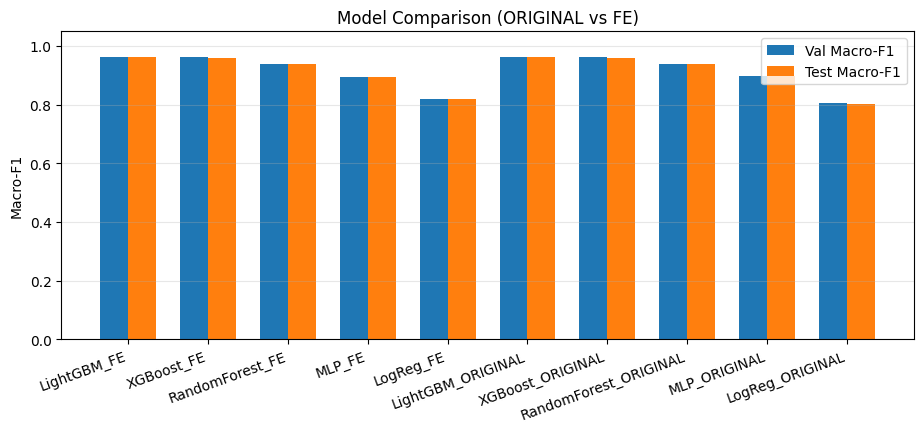

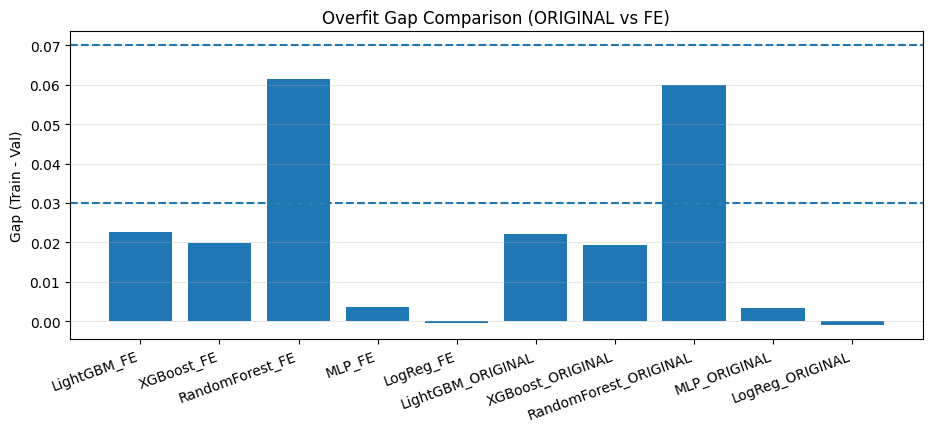

,model,gap_train_val_FE,gap_train_val_ORIGINAL,test_macro_f1_FE,test_macro_f1_ORIGINAL,train_macro_f1_FE,train_macro_f1_ORIGINAL,val_macro_f1_FE,val_macro_f1_ORIGINAL,delta_val(FE-ORIGINAL),delta_test(FE-ORIGINAL),delta_gap(FE-ORIGINAL)
0,LogReg,-0.0006,-0.0011,0.8183,0.8040,0.8191,0.8066,0.8197,0.8077,0.0120,0.0142,0.0004
1,XGBoost,0.0198,0.0193,0.9610,0.9601,0.9811,0.9807,0.9613,0.9614,-0.0002,0.0009,0.0006
2,LightGBM,0.0225,0.0221,0.9629,0.9635,0.9860,0.9860,0.9635,0.9639,-0.0003,-0.0006,0.0004
3,RandomForest,0.0616,0.0599,0.9388,0.9405,1.0000,1.0000,0.9384,0.9401,-0.0017,-0.0018,0.0017
4,MLP,0.0037,0.0034,0.8946,0.8981,0.8976,0.9009,0.8939,0.8975,-0.0036,-0.0035,0.0003


In [81]:
# ===================== ONE CELL: 5 models x (ORIGINAL vs FE) + tables + plots =====================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _pack(model, variant, out, best_param=""):
    tr = float(out["train_macro_f1"])
    va = float(out["val_macro_f1"])
    te = float(out["test_macro_f1"])
    return {
        "model": model,
        "variant": variant,  # "ORIGINAL" or "FE"
        "train_macro_f1": tr,
        "val_macro_f1": va,
        "test_macro_f1": te,
        "gap_train_val": tr - va,
        "best_param": best_param
    }

# ---- Build results (10 rows = 5 models * 2 variants) ----
results_all = []

# RandomForest
results_all.append(_pack("RandomForest", "ORIGINAL", rf_out_original, best_param=f"n={rf_out_original.get('best_n','')}"))
results_all.append(_pack("RandomForest", "FE",       rf_out_fe,  best_param=f"n={rf_out_fe.get('best_n','')}"))

# Logistic Regression
results_all.append(_pack("LogReg", "ORIGINAL", lr_out_original, best_param=f"C={lr_out_original.get('best_C', lr_out_original.get('best_param',''))}"))
results_all.append(_pack("LogReg", "FE",       lr_out_fe,  best_param=f"C={lr_out_fe.get('best_C', lr_out_fe.get('best_param',''))}"))

# XGBoost
results_all.append(_pack("XGBoost", "ORIGINAL", xgb_out_original, best_param=f"n={xgb_out_original.get('best_n','')}"))
results_all.append(_pack("XGBoost", "FE",       xgb_out_fe,  best_param=f"n={xgb_out_fe.get('best_n','')}"))

# LightGBM
results_all.append(_pack("LightGBM", "ORIGINAL", lgbm_out_original, best_param=f"n={lgbm_out_original.get('best_n','')}"))
results_all.append(_pack("LightGBM", "FE",       lgbm_out_fe,  best_param=f"n={lgbm_out_fe.get('best_n','')}"))

# MLP (PyTorch)
results_all.append(_pack("MLP", "ORIGINAL", mlp_out_original, best_param=str(mlp_out_original.get("best_param",""))))
results_all.append(_pack("MLP", "FE",       mlp_out_fe,  best_param=str(mlp_out_fe.get("best_param",""))))

# ---- LONG table (10 rows) ----
summary = pd.DataFrame(results_all)
summary_sorted = summary.sort_values(
    ["variant", "val_macro_f1", "test_macro_f1"],
    ascending=[True, False, False]
).reset_index(drop=True)

# nicer rounding
for c in ["train_macro_f1", "val_macro_f1", "test_macro_f1", "gap_train_val"]:
    summary_sorted[c] = summary_sorted[c].round(4)

display(summary_sorted)

# ---- Plot: Val vs Test Macro-F1 (10 bars x2) ----
plt.figure(figsize=(11,4))
x = np.arange(len(summary_sorted))
w = 0.35

plt.bar(x - w/2, summary_sorted["val_macro_f1"],  w, label="Val Macro-F1")
plt.bar(x + w/2, summary_sorted["test_macro_f1"], w, label="Test Macro-F1")
plt.xticks(x, (summary_sorted["model"] + "_" + summary_sorted["variant"]), rotation=20, ha="right")
plt.ylim(0, 1.05)
plt.ylabel("Macro-F1")
plt.title("Model Comparison (ORIGINAL vs FE)")
plt.grid(axis="y", alpha=0.3)
plt.legend()
plt.show()

# ---- Plot: Overfit gap (Train - Val) ----
plt.figure(figsize=(11,4))
plt.bar(np.arange(len(summary_sorted)), summary_sorted["gap_train_val"])
plt.xticks(np.arange(len(summary_sorted)), (summary_sorted["model"] + "_" + summary_sorted["variant"]), rotation=20, ha="right")
plt.ylabel("Gap (Train - Val)")
plt.title("Overfit Gap Comparison (ORIGINAL vs FE)")
plt.axhline(0.03, linestyle="--")
plt.axhline(0.07, linestyle="--")
plt.grid(axis="y", alpha=0.3)
plt.show()

# ---- WIDE table (5 rows): ORIGINAL vs FE + deltas ----
wide = summary.pivot_table(
    index="model",
    columns="variant",
    values=["train_macro_f1", "val_macro_f1", "test_macro_f1", "gap_train_val"],
    aggfunc="first"
)

wide.columns = [f"{metric}_{variant}" for metric, variant in wide.columns]
wide = wide.reset_index()

wide["delta_val(FE-ORIGINAL)"]  = wide["val_macro_f1_FE"]  - wide["val_macro_f1_ORIGINAL"]
wide["delta_test(FE-ORIGINAL)"] = wide["test_macro_f1_FE"] - wide["test_macro_f1_ORIGINAL"]
wide["delta_gap(FE-ORIGINAL)"]  = wide["gap_train_val_FE"] - wide["gap_train_val_ORIGINAL"]

# round
num_cols = [c for c in wide.columns if c != "model"]
wide[num_cols] = wide[num_cols].astype(float).round(4)

display(wide.sort_values("delta_val(FE-ORIGINAL)", ascending=False).reset_index(drop=True))
